In [1]:
# Importing the required packages
import os, shutil
import keras
from keras.preprocessing.image import ImageDataGenerator
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from tensorflow.keras import layers, models, optimizers
from keras.callbacks import EarlyStopping

In [2]:
# Getting the current working directory
directory = os.getcwd()
directory

'C:\\Users\\anton\\Desktop\\ProjetoDeepLearningFinalFinal'

In [3]:
# The directory where the original dataset is stored
dataset_directory = directory+'\\Dataset'
# The directory where the original Fully Covered photos are stored
fully_directory = dataset_directory+'\\fully_covered'
# The directory where the original Not Covered photos are stored
not_directory = dataset_directory+'\\not_covered'
# The directory where the original Not Face photos are stored
not_face_directory = dataset_directory+'\\not_face'
# The directory where the original Partially Covered photos are stored
partially_directory = dataset_directory+'\\partially_covered'
# The directory where the split dataset will be stored
split_directory = directory+'\\Split_Dataset'
# The directory where the Train data will be stored
train_directory = split_directory+'\\Train'
# The directory where the Validation data will be stored
validation_directory = split_directory+'\\Validation'
# The directory where the Test data will be stored
test_directory = split_directory+'\\Test'
# The directory where the Fully Covered photos for training will be stored
fully_train_directory = train_directory+'\\fully_covered'
# The directory where the Not Covered photos for training will be stored
not_train_directory = train_directory+'\\not_covered'
# The directory where the Not Face photos for training will be stored
not_face_train_directory = train_directory+'\\not_face'
# The directory where the Partially Covered photos for training will be stored
partially_train_directory = train_directory+'\\partially_covered'
# The directory where the Fully Covered photos for validation will be stored
fully_validation_directory = validation_directory+'\\fully_covered'
# The directory where the Not Covered photos for validation will be stored
not_validation_directory = validation_directory+'\\not_covered'
# The directory where the Not Face photos for validation will be stored
not_face_validation_directory = validation_directory+'\\not_face'
# The directory where the Partially Covered photos for validation will be stored
partially_validation_directory = validation_directory+'\\partially_covered'
# The directory where the Fully Covered photos for testing will be stored
fully_test_directory = test_directory+'\\fully_covered'
# The directory where the Not Covered photos for testing will be stored
not_test_directory = test_directory+'\\not_covered'
# The directory where the Not Face photos for testing will be stored
not_face_test_directory = test_directory+'\\not_face'
# The directory where the Partially Covered photos for testing will be stored
partially_test_directory = test_directory+'\\partially_covered'
# List with all the directories that we need to create
directories = [split_directory,train_directory,validation_directory,test_directory,
              fully_train_directory,not_train_directory,not_face_train_directory,partially_train_directory,
              fully_validation_directory,not_validation_directory,not_face_validation_directory,partially_validation_directory,
              fully_test_directory,not_test_directory,not_face_test_directory,partially_test_directory]

In [4]:
# (only run the 1st time running the notebook)

# Loop to create all the directories
for i in range(len(directories)):
    os.mkdir(directories[i])

In [5]:
# (only run the 1st time running the notebook)

# 80% / 10% / 10% split of the photos

# 0.8 * 1451 = 1161 Fully Covered photos
# 0.1 * 1451 = 145 Fully Covered photos   
# Adding the Fully Covered photos to the corresponding directories    
for i in range(len(os.listdir(fully_directory))):
    if i < 1161:
        source = fully_directory+'\\'+os.listdir(fully_directory)[i]
        destiny = fully_train_directory+'\\'+os.listdir(fully_directory)[i]
        shutil.copyfile(source,destiny)
    elif i < 1306:
        source = fully_directory+'\\'+os.listdir(fully_directory)[i]
        destiny = fully_validation_directory+'\\'+os.listdir(fully_directory)[i]
        shutil.copyfile(source,destiny)
    elif i < 1451:
        source = fully_directory+'\\'+os.listdir(fully_directory)[i]
        destiny = fully_test_directory+'\\'+os.listdir(fully_directory)[i]
        shutil.copyfile(source,destiny)

# 0.8 * 3664 = 2931 Not Covered photos
# 0.1 * 3664 = 366 Not Covered photos (367 for validation, 366 for test)
# Adding the Not Covered photos to the corresponding directories
for i in range(len(os.listdir(not_directory))):
    if i < 2931:
        source = not_directory+'\\'+os.listdir(not_directory)[i]
        destiny = not_train_directory+'\\'+os.listdir(not_directory)[i]
        shutil.copyfile(source,destiny)
    elif i < 3298:
        source = not_directory+'\\'+os.listdir(not_directory)[i]
        destiny = not_validation_directory+'\\'+os.listdir(not_directory)[i]
        shutil.copyfile(source,destiny)
    elif i < 3664:
        source = not_directory+'\\'+os.listdir(not_directory)[i]
        destiny = not_test_directory+'\\'+os.listdir(not_directory)[i]
        shutil.copyfile(source,destiny)

# 0.8 * 1114 = 891 Not Face photos
# 0.1 * 1114 = 111 Not Face photos (112 for validation, 111 for test)
# Adding the Not Face photos to the corresponding directories
for i in range(len(os.listdir(not_face_directory))):
    if i < 891:
        source = not_face_directory+'\\'+os.listdir(not_face_directory)[i]
        destiny = not_face_train_directory+'\\'+os.listdir(not_face_directory)[i]
        shutil.copyfile(source,destiny)
    elif i < 1003:
        source = not_face_directory+'\\'+os.listdir(not_face_directory)[i]
        destiny = not_face_validation_directory+'\\'+os.listdir(not_face_directory)[i]
        shutil.copyfile(source,destiny)
    elif i < 1114:
        source = not_face_directory+'\\'+os.listdir(not_face_directory)[i]
        destiny = not_face_test_directory+'\\'+os.listdir(not_face_directory)[i]
        shutil.copyfile(source,destiny)
        
# 0.8 * 392 = 314 Partially Covered photos
# 0.1 * 392 = 39 Partially Covered photos
# Adding the Partially Covered photos to the corresponding directories
for i in range(len(os.listdir(partially_directory))):
    if i < 314:
        source = partially_directory+'\\'+os.listdir(partially_directory)[i]
        destiny = partially_train_directory+'\\'+os.listdir(partially_directory)[i]
        shutil.copyfile(source,destiny)
    elif i < 353:
        source = partially_directory+'\\'+os.listdir(partially_directory)[i]
        destiny = partially_validation_directory+'\\'+os.listdir(partially_directory)[i]
        shutil.copyfile(source,destiny)
    elif i < 392:
        source = partially_directory+'\\'+os.listdir(partially_directory)[i]
        destiny = partially_test_directory+'\\'+os.listdir(partially_directory)[i]
        shutil.copyfile(source,destiny)

In [6]:
# Defining a function that will display the curves of loss and accuracy during training 
#(same code from slide 101, 'CNNs_TF2') 

def training_plots(history):
    acc= history.history['categorical_accuracy']
    val_acc= history.history['val_categorical_accuracy']
    loss= history.history['loss']
    val_loss=history.history['val_loss']
    epochs= range(1, len(acc)+1)

    plt.plot(epochs, acc, 'bo', label= 'Training acc')
    plt.plot(epochs, val_acc, 'b', label= 'Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label= 'Training loss')
    plt.plot(epochs, val_loss, 'b', label= 'Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

In [7]:
# We will create several models
# Each model will have several convolutional layers (after each one, we will have a max pooling layer)
# After the convolutional layers, we will have a flatten layer
# After the flatten layer, we will have several dense layers (the last one will have 4 neurons)
# The activation function will be 'relu' for all layers, except the last one, which will be 'softmax'
# We will train each model for different image sizes and batch sizes (20, 32 and 64)

In [8]:
# Rescalling the pixel values (between 0 and 255) to the [0,1] interval
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
# The generator yields batches of 64x64 RBG images (shape (20,64,64,3)) and binary labels (shape(20))
train_generator64_20 = train_datagen.flow_from_directory(
    train_directory,
    target_size = (64,64),
    batch_size = 20,
    class_mode = 'categorical'
)
# The generator yields batches of 64x64 RBG images (shape (32,64,64,3)) and binary labels (shape(32))
train_generator64_32 = train_datagen.flow_from_directory(
    train_directory,
    target_size = (64,64),
    batch_size = 32,
    class_mode = 'categorical'
)
# The generator yields batches of 64x64 RBG images (shape (64,64,64,3)) and binary labels (shape(64))
train_generator64_64 = train_datagen.flow_from_directory(
    train_directory,
    target_size = (64,64),
    batch_size = 64,
    class_mode = 'categorical'
)

# The generator yields batches of 128x128 RBG images (shape (20,128,128,3)) and binary labels (shape(20))
train_generator128_20 = train_datagen.flow_from_directory(
    train_directory,
    target_size = (128,128),
    batch_size = 20,
    class_mode = 'categorical'
)
# The generator yields batches of 128x128 RBG images (shape (32,128,128,3)) and binary labels (shape(32))
train_generator128_32 = train_datagen.flow_from_directory(
    train_directory,
    target_size = (128,128),
    batch_size = 32,
    class_mode = 'categorical'
)
# The generator yields batches of 128x128 RBG images (shape (64,128,128,3)) and binary labels (shape(64))
train_generator128_64 = train_datagen.flow_from_directory(
    train_directory,
    target_size = (128,128),
    batch_size = 64,
    class_mode = 'categorical'
)

# The generator yields batches of 150x150 RBG images (shape (20,150,150,3)) and binary labels (shape(20))
train_generator150_20 = train_datagen.flow_from_directory(
    train_directory,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'categorical'
)
# The generator yields batches of 150x150 RBG images (shape (32,150,150,3)) and binary labels (shape(32))
train_generator150_32 = train_datagen.flow_from_directory(
    train_directory,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)
# The generator yields batches of 150x150 RBG images (shape (64,150,150,3)) and binary labels (shape(64))
train_generator150_64 = train_datagen.flow_from_directory(
    train_directory,
    target_size = (150,150),
    batch_size = 64,
    class_mode = 'categorical'
)

# The generator yields batches of 227x227 RBG images (shape (64,227,227,3)) and binary labels (shape(64)) --> AlexNet
train_generator_alex_net = train_datagen.flow_from_directory(
    train_directory,
    target_size = (227,227),
    batch_size = 64,
    class_mode = 'categorical'
)

# The generator yields batches of 64x64 RBG images (shape (20,64,64,3)) and binary labels (shape(20))
validation_generator64_20 = validation_datagen.flow_from_directory(
    validation_directory,
    target_size = (64,64),
    batch_size = 20,
    class_mode = 'categorical'
)
# The generator yields batches of 64x64 RBG images (shape (32,64,64,3)) and binary labels (shape(32))
validation_generator64_32 = validation_datagen.flow_from_directory(
    validation_directory,
    target_size = (64,64),
    batch_size = 32,
    class_mode = 'categorical'
)
# The generator yields batches of 64x64 RBG images (shape (64,64,64,3)) and binary labels (shape(64))
validation_generator64_64 = validation_datagen.flow_from_directory(
    validation_directory,
    target_size = (64,64),
    batch_size = 64,
    class_mode = 'categorical'
)

# The generator yields batches of 128x128 RBG images (shape (20,128,128,3)) and binary labels (shape(20))
validation_generator128_20 = validation_datagen.flow_from_directory(
    validation_directory,
    target_size = (128,128),
    batch_size = 20,
    class_mode = 'categorical'
)
# The generator yields batches of 128x128 RBG images (shape (32,128,128,3)) and binary labels (shape(32))
validation_generator128_32 = validation_datagen.flow_from_directory(
    validation_directory,
    target_size = (128,128),
    batch_size = 32,
    class_mode = 'categorical'
)
# The generator yields batches of 128x128 RBG images (shape (64,128,128,3)) and binary labels (shape(64))
validation_generator128_64 = validation_datagen.flow_from_directory(
    validation_directory,
    target_size = (128,128),
    batch_size = 64,
    class_mode = 'categorical'
)

# The generator yields batches of 150x150 RBG images (shape (20,150,150,3)) and binary labels (shape(20))
validation_generator150_20 = validation_datagen.flow_from_directory(
    validation_directory,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'categorical'
)
# The generator yields batches of 150x150 RBG images (shape (32,150,150,3)) and binary labels (shape(32))
validation_generator150_32 = validation_datagen.flow_from_directory(
    validation_directory,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)
# The generator yields batches of 150x150 RBG images (shape (64,150,150,3)) and binary labels (shape(64))
validation_generator150_64 = validation_datagen.flow_from_directory(
    validation_directory,
    target_size = (150,150),
    batch_size = 64,
    class_mode = 'categorical'
)

# The generator yields batches of 227x227 RBG images (shape (64,227,227,3)) and binary labels (shape(64)) --> AlexNet
validation_generator_alex_net = validation_datagen.flow_from_directory(
    validation_directory,
    target_size = (227,227),
    batch_size = 64,
    class_mode = 'categorical'
)

Found 5297 images belonging to 4 classes.
Found 5297 images belonging to 4 classes.
Found 5297 images belonging to 4 classes.
Found 5297 images belonging to 4 classes.
Found 5297 images belonging to 4 classes.
Found 5297 images belonging to 4 classes.
Found 5297 images belonging to 4 classes.
Found 5297 images belonging to 4 classes.
Found 5297 images belonging to 4 classes.
Found 5297 images belonging to 4 classes.
Found 663 images belonging to 4 classes.
Found 663 images belonging to 4 classes.
Found 663 images belonging to 4 classes.
Found 663 images belonging to 4 classes.
Found 663 images belonging to 4 classes.
Found 663 images belonging to 4 classes.
Found 663 images belonging to 4 classes.
Found 663 images belonging to 4 classes.
Found 663 images belonging to 4 classes.
Found 663 images belonging to 4 classes.


In [10]:
# Defining a function that will perform the model evaluation, when the image size is 64x64px, and batch_size is 20
# This function will receive a model and a directory (to know where to get the images)
def model_evaluation_64_20(model, directory_evaluation=[]):
    for i in range(len(directory_evaluation)):
        generator = test_datagen.flow_from_directory(
            directory_evaluation[i],
            target_size = (64,64),
            batch_size = 20,
            class_mode = 'categorical',
            shuffle = False
        )
        epoch_steps = math.ceil(generator.samples/generator.batch_size)
        
        # Fit the model to the data using the created generator
        Y_pred = model.predict_generator(generator, steps=epoch_steps)
        # Get the most probable class from the prediction
        Y_class = np.argmax(Y_pred, axis = 1)
        
        real_classes = generator.classes
        labels_classes = list(generator.class_indices.keys())
                
        # Printing the classification report for the model that was inputed into the function
        report_model = classification_report(real_classes, Y_class, target_names = labels_classes)
        print(report_model)

# Defining a function that will perform the model evaluation, when the image size is 64x64px, and batch_size is 32
# This function will receive a model and a directory (to know where to get the images)
def model_evaluation_64_32(model, directory_evaluation=[]):
    for i in range(len(directory_evaluation)):
        generator = test_datagen.flow_from_directory(
            directory_evaluation[i],
            target_size = (64,64),
            batch_size = 32,
            class_mode = 'categorical',
            shuffle = False
        )
        epoch_steps = math.ceil(generator.samples/generator.batch_size)
        
        # Fit the model to the data using the created generator
        Y_pred = model.predict_generator(generator, steps=epoch_steps)
        # Get the most probable class from the prediction
        Y_class = np.argmax(Y_pred, axis = 1)
        
        real_classes = generator.classes
        labels_classes = list(generator.class_indices.keys())
                
        # Printing the classification report for the model that was inputed into the function
        report_model = classification_report(real_classes, Y_class, target_names = labels_classes)
        print(report_model)
        
# Defining a function that will perform the model evaluation, when the image size is 64x64px, and batch_size is 64
# This function will receive a model and a directory (to know where to get the images)
def model_evaluation_64_64(model, directory_evaluation=[]):
    for i in range(len(directory_evaluation)):
        generator = test_datagen.flow_from_directory(
            directory_evaluation[i],
            target_size = (64,64),
            batch_size = 64,
            class_mode = 'categorical',
            shuffle = False
        )
        epoch_steps = math.ceil(generator.samples/generator.batch_size)
        
        # Fit the model to the data using the created generator
        Y_pred = model.predict_generator(generator, steps=epoch_steps)
        # Get the most probable class from the prediction
        Y_class = np.argmax(Y_pred, axis = 1)
        
        real_classes = generator.classes
        labels_classes = list(generator.class_indices.keys())
                
        # Printing the classification report for the model that was inputed into the function
        report_model = classification_report(real_classes, Y_class, target_names = labels_classes)
        print(report_model)

In [11]:
# Defining a function that will perform the model evaluation, when the image size is 128x128px, and batch_size is 20
# This function will receive a model and a directory (to know where to get the images)
def model_evaluation_128_20(model, directory_evaluation=[]):
    for i in range(len(directory_evaluation)):
        generator = test_datagen.flow_from_directory(
            directory_evaluation[i],
            target_size = (128,128),
            batch_size = 20,
            class_mode = 'categorical',
            shuffle = False
        )
        epoch_steps = math.ceil(generator.samples/generator.batch_size)
        
        # Fit the model to the data using the created generator
        Y_pred = model.predict_generator(generator, steps=epoch_steps)
        # Get the most probable class from the prediction
        Y_class = np.argmax(Y_pred, axis = 1)
        
        real_classes = generator.classes
        labels_classes = list(generator.class_indices.keys())
                
        # Printing the classification report for the model that was inputed into the function
        report_model = classification_report(real_classes, Y_class, target_names = labels_classes)
        print(report_model)

# Defining a function that will perform the model evaluation, when the image size is 128x128px, and batch_size is 32
# This function will receive a model and a directory (to know where to get the images)
def model_evaluation_128_32(model, directory_evaluation=[]):
    for i in range(len(directory_evaluation)):
        generator = test_datagen.flow_from_directory(
            directory_evaluation[i],
            target_size = (128,128),
            batch_size = 32,
            class_mode = 'categorical',
            shuffle = False
        )
        epoch_steps = math.ceil(generator.samples/generator.batch_size)
        
        # Fit the model to the data using the created generator
        Y_pred = model.predict_generator(generator, steps=epoch_steps)
        # Get the most probable class from the prediction
        Y_class = np.argmax(Y_pred, axis = 1)
        
        real_classes = generator.classes
        labels_classes = list(generator.class_indices.keys())
                
        # Printing the classification report for the model that was inputed into the function
        report_model = classification_report(real_classes, Y_class, target_names = labels_classes)
        print(report_model)
        
# Defining a function that will perform the model evaluation, when the image size is 128x128px, and batch_size is 64
# This function will receive a model and a directory (to know where to get the images)
def model_evaluation_128_64(model, directory_evaluation=[]):
    for i in range(len(directory_evaluation)):
        generator = test_datagen.flow_from_directory(
            directory_evaluation[i],
            target_size = (128,128),
            batch_size = 64,
            class_mode = 'categorical',
            shuffle = False
        )
        epoch_steps = math.ceil(generator.samples/generator.batch_size)
        
        # Fit the model to the data using the created generator
        Y_pred = model.predict_generator(generator, steps=epoch_steps)
        # Get the most probable class from the prediction
        Y_class = np.argmax(Y_pred, axis = 1)
        
        real_classes = generator.classes
        labels_classes = list(generator.class_indices.keys())
                
        # Printing the classification report for the model that was inputed into the function
        report_model = classification_report(real_classes, Y_class, target_names = labels_classes)
        print(report_model)

In [12]:
# Defining a function that will perform the model evaluation, when the image size is 150x150px, and batch_size is 20
# This function will receive a model and a directory (to know where to get the images)
def model_evaluation_150_20(model, directory_evaluation=[]):
    for i in range(len(directory_evaluation)):
        generator = test_datagen.flow_from_directory(
            directory_evaluation[i],
            target_size = (150,150),
            batch_size = 20,
            class_mode = 'categorical',
            shuffle = False
        )
        epoch_steps = math.ceil(generator.samples/generator.batch_size)
        
        # Fit the model to the data using the created generator
        Y_pred = model.predict_generator(generator, steps=epoch_steps)
        # Get the most probable class from the prediction
        Y_class = np.argmax(Y_pred, axis = 1)
        
        real_classes = generator.classes
        labels_classes = list(generator.class_indices.keys())
                
        # Printing the classification report for the model that was inputed into the function
        report_model = classification_report(real_classes, Y_class, target_names = labels_classes)
        print(report_model)

# Defining a function that will perform the model evaluation, when the image size is 150x150px, and batch_size is 32
# This function will receive a model and a directory (to know where to get the images)
def model_evaluation_150_32(model, directory_evaluation=[]):
    for i in range(len(directory_evaluation)):
        generator = test_datagen.flow_from_directory(
            directory_evaluation[i],
            target_size = (150,150),
            batch_size = 32,
            class_mode = 'categorical',
            shuffle = False
        )
        epoch_steps = math.ceil(generator.samples/generator.batch_size)
        
        # Fit the model to the data using the created generator
        Y_pred = model.predict_generator(generator, steps=epoch_steps)
        # Get the most probable class from the prediction
        Y_class = np.argmax(Y_pred, axis = 1)
        
        real_classes = generator.classes
        labels_classes = list(generator.class_indices.keys())
                
        # Printing the classification report for the model that was inputed into the function
        report_model = classification_report(real_classes, Y_class, target_names = labels_classes)
        print(report_model)
        
# Defining a function that will perform the model evaluation, when the image size is 150x150px, and batch_size is 64
# This function will receive a model and a directory (to know where to get the images)
def model_evaluation_150_64(model, directory_evaluation=[]):
    for i in range(len(directory_evaluation)):
        generator = test_datagen.flow_from_directory(
            directory_evaluation[i],
            target_size = (150,150),
            batch_size = 64,
            class_mode = 'categorical',
            shuffle = False
        )
        epoch_steps = math.ceil(generator.samples/generator.batch_size)
        
        # Fit the model to the data using the created generator
        Y_pred = model.predict_generator(generator, steps=epoch_steps)
        # Get the most probable class from the prediction
        Y_class = np.argmax(Y_pred, axis = 1)
        
        real_classes = generator.classes
        labels_classes = list(generator.class_indices.keys())
                
        # Printing the classification report for the model that was inputed into the function
        report_model = classification_report(real_classes, Y_class, target_names = labels_classes)
        print(report_model)

In [13]:
# Defining a function that will perform the model evaluation, when the image size is 227x227px --> AlexNet
# This function will receive a model and a directory (to know where to get the images)
def model_evaluation_227(model, directory_evaluation=[]):
    for i in range(len(directory_evaluation)):
        generator = test_datagen.flow_from_directory(
            directory_evaluation[i],
            target_size = (227,227),
            batch_size = 64,
            class_mode = 'categorical',
            shuffle = False
        )
        epoch_steps = math.ceil(generator.samples/generator.batch_size)
        
        # Fit the model to the data using the created generator
        Y_pred = model.predict_generator(generator, steps=epoch_steps)
        # Get the most probable class from the prediction
        Y_class = np.argmax(Y_pred, axis = 1)
        
        real_classes = generator.classes
        labels_classes = list(generator.class_indices.keys())
                
        # Printing the classification report for the model that was inputed into the function
        report_model = classification_report(real_classes, Y_class, target_names = labels_classes)
        print(report_model)

In [14]:
callbacks_list = [
    keras.callbacks.EarlyStopping(
    monitor = 'val_categorical_accuracy',
    patience = 2)
]

# Creating and testing models

## 1. Model 1

We will train this model for the 3 different image sizes (64x64px, 128x128px, 150x150px). After finding which one is the best, we will train the model for that image size, for different batch_sizes

### 1.1. Model 1 - 64x64px//batch_size = 20

In [15]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['categorical_accuracy'])

D:\anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [16]:
history = model.fit(
    train_generator64_20,
    steps_per_epoch = 264,  # train_n_samples=5297; batch_size=20
    epochs = 30,
    callbacks = callbacks_list,
    validation_data = validation_generator64_20,
    validation_steps = 33 #  validation_n_samples=663; batch_size=20
)

Epoch 1/30
264/264 [==============================] - 44s 165ms/step - loss: 0.9559 - categorical_accuracy: 0.6316 - val_loss: 0.6787 - val_categorical_accuracy: 0.7667
Epoch 2/30
264/264 [==============================] - 16s 59ms/step - loss: 0.5404 - categorical_accuracy: 0.8006 - val_loss: 0.4248 - val_categorical_accuracy: 0.8515
Epoch 3/30
264/264 [==============================] - 14s 52ms/step - loss: 0.3851 - categorical_accuracy: 0.8649 - val_loss: 0.4513 - val_categorical_accuracy: 0.8455
Epoch 4/30
264/264 [==============================] - 13s 50ms/step - loss: 0.3078 - categorical_accuracy: 0.8927 - val_loss: 0.2713 - val_categorical_accuracy: 0.9152
Epoch 5/30
264/264 [==============================] - 13s 50ms/step - loss: 0.2420 - categorical_accuracy: 0.9172 - val_loss: 0.3581 - val_categorical_accuracy: 0.8848
Epoch 6/30
264/264 [==============================] - 15s 55ms/step - loss: 0.1885 - categorical_accuracy: 0.9380 - val_loss: 0.2253 - val_categorical_accuracy

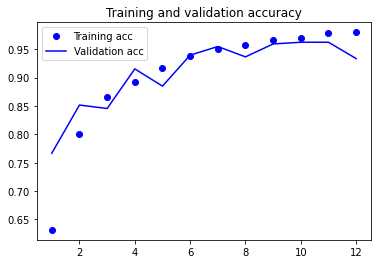

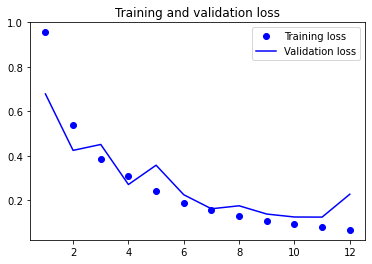

In [17]:
training_plots(history)

In [18]:
model_evaluation_64_20(model, [test_directory])

Found 661 images belonging to 4 classes.


<ipython-input-10-a9619eae2628>:15: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(generator, steps=epoch_steps)


                   precision    recall  f1-score   support

    fully_covered       0.98      0.88      0.93       145
      not_covered       0.89      0.99      0.94       366
         not_face       0.97      0.82      0.89       111
partially_covered       0.90      0.67      0.76        39

         accuracy                           0.92       661
        macro avg       0.93      0.84      0.88       661
     weighted avg       0.92      0.92      0.92       661



### 1.2. Model 1 - 128x128px//batch_size = 20

In [19]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['categorical_accuracy'])

D:\anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [20]:
history = model.fit(
    train_generator128_20,
    steps_per_epoch = 264,  # train_n_samples=5297; batch_size=20
    epochs = 30,
    callbacks = callbacks_list,
    validation_data = validation_generator128_20,
    validation_steps = 33 #  validation_n_samples=663; batch_size=20
)

Epoch 1/30
264/264 [==============================] - 70s 264ms/step - loss: 0.6735 - categorical_accuracy: 0.7499 - val_loss: 0.4249 - val_categorical_accuracy: 0.8409
Epoch 2/30
264/264 [==============================] - 72s 274ms/step - loss: 0.3116 - categorical_accuracy: 0.8969 - val_loss: 0.2159 - val_categorical_accuracy: 0.9288
Epoch 3/30
264/264 [==============================] - 68s 259ms/step - loss: 0.2129 - categorical_accuracy: 0.9335 - val_loss: 0.2175 - val_categorical_accuracy: 0.9212
Epoch 4/30
264/264 [==============================] - 68s 256ms/step - loss: 0.1556 - categorical_accuracy: 0.9507 - val_loss: 0.1536 - val_categorical_accuracy: 0.9485
Epoch 5/30
264/264 [==============================] - 68s 259ms/step - loss: 0.1271 - categorical_accuracy: 0.9589 - val_loss: 0.1543 - val_categorical_accuracy: 0.9470
Epoch 6/30
264/264 [==============================] - 72s 272ms/step - loss: 0.0946 - categorical_accuracy: 0.9699 - val_loss: 0.1212 - val_categorical_acc

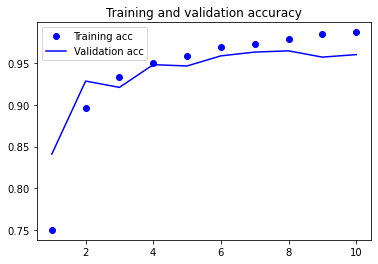

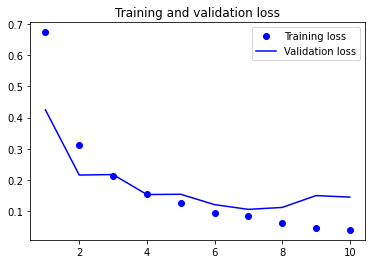

In [21]:
training_plots(history)

In [22]:
model_evaluation_128_20(model, [test_directory])

Found 661 images belonging to 4 classes.


<ipython-input-11-bad17ae776fb>:15: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(generator, steps=epoch_steps)


                   precision    recall  f1-score   support

    fully_covered       1.00      0.91      0.95       145
      not_covered       0.99      0.98      0.98       366
         not_face       0.89      0.98      0.94       111
partially_covered       0.86      0.97      0.92        39

         accuracy                           0.96       661
        macro avg       0.94      0.96      0.95       661
     weighted avg       0.97      0.96      0.96       661



### 1.3. Model 1 - 150x150px//batch_size = 20

In [23]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['categorical_accuracy'])

D:\anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [24]:
history = model.fit(
    train_generator150_20,
    steps_per_epoch = 264,  # train_n_samples=5297; batch_size=20
    epochs = 30,
    callbacks = callbacks_list,
    validation_data = validation_generator150_20,
    validation_steps = 33 #  validation_n_samples=663; batch_size=20
)

Epoch 1/30
264/264 [==============================] - 105s 394ms/step - loss: 0.6858 - categorical_accuracy: 0.7442 - val_loss: 0.3683 - val_categorical_accuracy: 0.8712
Epoch 2/30
264/264 [==============================] - 104s 393ms/step - loss: 0.3222 - categorical_accuracy: 0.8916 - val_loss: 0.2656 - val_categorical_accuracy: 0.9121
Epoch 3/30
264/264 [==============================] - 102s 386ms/step - loss: 0.2312 - categorical_accuracy: 0.9248 - val_loss: 0.2066 - val_categorical_accuracy: 0.9348
Epoch 4/30
264/264 [==============================] - 110s 417ms/step - loss: 0.1701 - categorical_accuracy: 0.9450 - val_loss: 0.2261 - val_categorical_accuracy: 0.9273
Epoch 5/30
264/264 [==============================] - 102s 388ms/step - loss: 0.1368 - categorical_accuracy: 0.9549 - val_loss: 0.2073 - val_categorical_accuracy: 0.9333


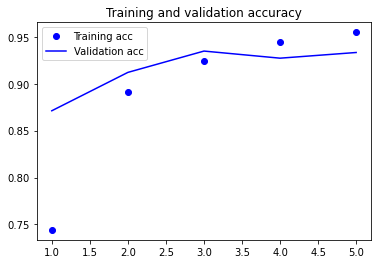

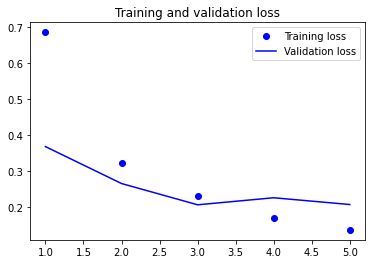

In [25]:
training_plots(history)

In [26]:
model_evaluation_150_20(model, [test_directory])

Found 661 images belonging to 4 classes.


<ipython-input-12-e59ee181f5d9>:15: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(generator, steps=epoch_steps)


                   precision    recall  f1-score   support

    fully_covered       0.99      0.90      0.94       145
      not_covered       0.99      0.93      0.96       366
         not_face       0.73      1.00      0.84       111
partially_covered       0.97      0.87      0.92        39

         accuracy                           0.93       661
        macro avg       0.92      0.92      0.92       661
     weighted avg       0.95      0.93      0.93       661



### 1.4. Model 1 - 64x64px//batch_size = 32

In [68]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['categorical_accuracy'])

D:\anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [69]:
history = model.fit(
    train_generator64_32,
    steps_per_epoch = 165,  # train_n_samples=5297; batch_size=32
    epochs = 30,
    callbacks = callbacks_list,
    validation_data = validation_generator64_32,
    validation_steps = 20 #  validation_n_samples=663; batch_size=32
)

Epoch 1/30
165/165 [==============================] - 14s 79ms/step - loss: 1.0293 - categorical_accuracy: 0.6000 - val_loss: 0.8060 - val_categorical_accuracy: 0.6922
Epoch 2/30
165/165 [==============================] - 13s 81ms/step - loss: 0.6804 - categorical_accuracy: 0.7552 - val_loss: 0.5328 - val_categorical_accuracy: 0.8156
Epoch 3/30
165/165 [==============================] - 14s 87ms/step - loss: 0.4676 - categorical_accuracy: 0.8285 - val_loss: 0.4159 - val_categorical_accuracy: 0.8406
Epoch 4/30
165/165 [==============================] - 15s 91ms/step - loss: 0.3789 - categorical_accuracy: 0.8659 - val_loss: 0.3505 - val_categorical_accuracy: 0.8781
Epoch 5/30
165/165 [==============================] - 16s 98ms/step - loss: 0.3228 - categorical_accuracy: 0.8868 - val_loss: 0.3066 - val_categorical_accuracy: 0.9000
Epoch 6/30
165/165 [==============================] - 17s 100ms/step - loss: 0.2681 - categorical_accuracy: 0.9094 - val_loss: 0.2566 - val_categorical_accuracy

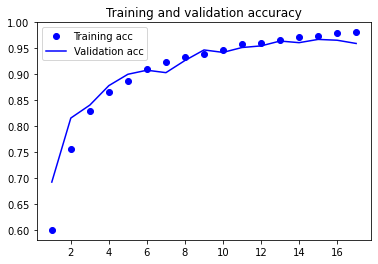

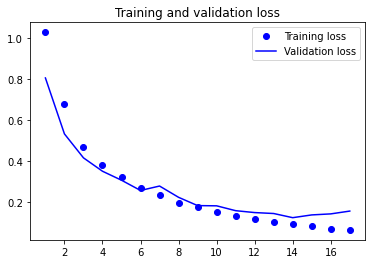

In [70]:
training_plots(history)

In [71]:
model_evaluation_64_32(model, [test_directory])

Found 661 images belonging to 4 classes.


<ipython-input-10-a9619eae2628>:40: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(generator, steps=epoch_steps)


                   precision    recall  f1-score   support

    fully_covered       0.99      0.95      0.97       145
      not_covered       0.99      0.98      0.99       366
         not_face       0.90      1.00      0.94       111
partially_covered       0.97      0.92      0.95        39

         accuracy                           0.97       661
        macro avg       0.96      0.96      0.96       661
     weighted avg       0.97      0.97      0.97       661



### 1.5. Model 1 - 64x64px//batch_size = 64

In [72]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['categorical_accuracy'])

D:\anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [73]:
history = model.fit(
    train_generator64_64,
    steps_per_epoch = 82,  # train_n_samples=5297; batch_size=64
    epochs = 30,
    callbacks = callbacks_list,
    validation_data = validation_generator64_64,
    validation_steps = 10 #  validation_n_samples=663; batch_size=64
)

Epoch 1/30
82/82 [==============================] - 15s 179ms/step - loss: 1.1110 - categorical_accuracy: 0.5555 - val_loss: 0.9716 - val_categorical_accuracy: 0.6016
Epoch 2/30
82/82 [==============================] - 13s 163ms/step - loss: 0.8455 - categorical_accuracy: 0.6969 - val_loss: 0.6839 - val_categorical_accuracy: 0.7781
Epoch 3/30
82/82 [==============================] - 13s 153ms/step - loss: 0.6268 - categorical_accuracy: 0.7669 - val_loss: 0.5363 - val_categorical_accuracy: 0.7984
Epoch 4/30
82/82 [==============================] - 13s 152ms/step - loss: 0.4982 - categorical_accuracy: 0.8188 - val_loss: 0.5133 - val_categorical_accuracy: 0.8203
Epoch 5/30
82/82 [==============================] - 13s 153ms/step - loss: 0.4298 - categorical_accuracy: 0.8410 - val_loss: 0.4127 - val_categorical_accuracy: 0.8438
Epoch 6/30
82/82 [==============================] - 13s 159ms/step - loss: 0.3795 - categorical_accuracy: 0.8676 - val_loss: 0.3684 - val_categorical_accuracy: 0.848

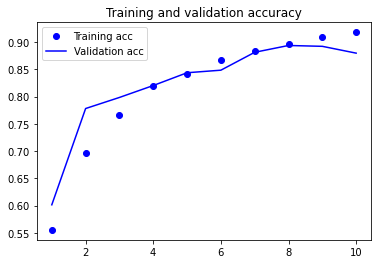

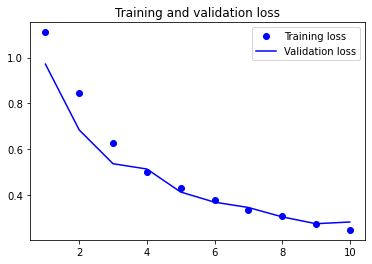

In [74]:
training_plots(history)

In [75]:
model_evaluation_64_64(model, [test_directory])

Found 661 images belonging to 4 classes.


<ipython-input-10-a9619eae2628>:65: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(generator, steps=epoch_steps)


                   precision    recall  f1-score   support

    fully_covered       0.82      0.95      0.88       145
      not_covered       0.94      0.95      0.94       366
         not_face       0.90      0.70      0.79       111
partially_covered       0.87      0.85      0.86        39

         accuracy                           0.90       661
        macro avg       0.88      0.86      0.87       661
     weighted avg       0.90      0.90      0.90       661



### 1.6. Saving the best model Model 1

The best model is the one trained with images with image size = 64x64px and the chosen batch_size is 20

In [100]:
callbacks_list_saving_model1 = [
    keras.callbacks.EarlyStopping(
    monitor = 'val_categorical_accuracy',
    patience = 2),
    keras.callbacks.ModelCheckpoint(
        filepath = 'saved_models/model1.h5',
        monitor = 'val_categorical_accuracy',
        save_best_only = True
    )
]

In [101]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['categorical_accuracy'])

D:\anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [102]:
history = model.fit(
    train_generator64_20,
    steps_per_epoch = 264,  # train_n_samples=5297; batch_size=20
    epochs = 30,
    callbacks = callbacks_list_saving_model1,
    validation_data = validation_generator64_20,
    validation_steps = 33 #  validation_n_samples=663; batch_size=20
)

Epoch 1/30
264/264 [==============================] - 16s 60ms/step - loss: 0.9896 - categorical_accuracy: 0.6199 - val_loss: 0.7291 - val_categorical_accuracy: 0.7227
Epoch 2/30
264/264 [==============================] - 15s 57ms/step - loss: 0.5703 - categorical_accuracy: 0.7878 - val_loss: 0.4631 - val_categorical_accuracy: 0.8212
Epoch 3/30
264/264 [==============================] - 15s 58ms/step - loss: 0.3905 - categorical_accuracy: 0.8611 - val_loss: 0.3440 - val_categorical_accuracy: 0.8742
Epoch 4/30
264/264 [==============================] - 16s 61ms/step - loss: 0.3055 - categorical_accuracy: 0.8979 - val_loss: 0.2872 - val_categorical_accuracy: 0.9015
Epoch 5/30
264/264 [==============================] - 16s 61ms/step - loss: 0.2441 - categorical_accuracy: 0.9172 - val_loss: 0.2183 - val_categorical_accuracy: 0.9258
Epoch 6/30
264/264 [==============================] - 17s 62ms/step - loss: 0.1941 - categorical_accuracy: 0.9325 - val_loss: 0.1885 - val_categorical_accuracy:

## 2. Model 2

We will train this model for the 3 different image sizes (64x64px, 128x128px, 150x150px). After finding which one is the best, we will train the model for that image size, for different batch_sizes. This model is similar to model 1, but has a dropout layer (with value 0.5) after the flatten layer

### 2.1. Model 2 - 64x64px//batch_size = 20

In [27]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['categorical_accuracy'])

D:\anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [28]:
history = model.fit(
    train_generator64_20,
    steps_per_epoch = 264,  # train_n_samples=5297; batch_size=20
    epochs = 30,
    callbacks = callbacks_list,
    validation_data = validation_generator64_20,
    validation_steps = 33 #  validation_n_samples=663; batch_size=20
)

Epoch 1/30
264/264 [==============================] - 18s 67ms/step - loss: 1.0701 - categorical_accuracy: 0.5767 - val_loss: 0.8833 - val_categorical_accuracy: 0.6485
Epoch 2/30
264/264 [==============================] - 19s 70ms/step - loss: 0.7558 - categorical_accuracy: 0.7212 - val_loss: 0.5436 - val_categorical_accuracy: 0.7848
Epoch 3/30
264/264 [==============================] - 19s 70ms/step - loss: 0.5160 - categorical_accuracy: 0.8058 - val_loss: 0.4247 - val_categorical_accuracy: 0.8652
Epoch 4/30
264/264 [==============================] - 18s 69ms/step - loss: 0.4149 - categorical_accuracy: 0.8476 - val_loss: 0.3305 - val_categorical_accuracy: 0.8727
Epoch 5/30
264/264 [==============================] - 19s 72ms/step - loss: 0.3475 - categorical_accuracy: 0.8770 - val_loss: 0.2749 - val_categorical_accuracy: 0.9106
Epoch 6/30
264/264 [==============================] - 19s 71ms/step - loss: 0.2976 - categorical_accuracy: 0.8973 - val_loss: 0.2854 - val_categorical_accuracy:

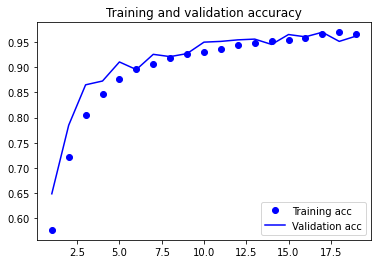

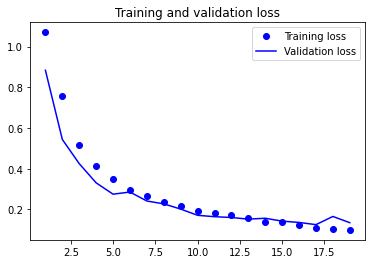

In [29]:
training_plots(history)

In [30]:
model_evaluation_64_20(model, [test_directory])

Found 661 images belonging to 4 classes.


<ipython-input-10-a9619eae2628>:15: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(generator, steps=epoch_steps)


                   precision    recall  f1-score   support

    fully_covered       0.99      0.94      0.97       145
      not_covered       0.98      0.99      0.98       366
         not_face       0.93      1.00      0.96       111
partially_covered       1.00      0.92      0.96        39

         accuracy                           0.98       661
        macro avg       0.98      0.96      0.97       661
     weighted avg       0.98      0.98      0.98       661



### 2.2. Model 2 - 128x128px//batch_size = 20

In [31]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['categorical_accuracy'])

D:\anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [32]:
history = model.fit(
    train_generator128_20,
    steps_per_epoch = 264,  # train_n_samples=5297; batch_size=20
    epochs = 30,
    callbacks = callbacks_list,
    validation_data = validation_generator128_20,
    validation_steps = 33 #  validation_n_samples=663; batch_size=20
)

Epoch 1/30
264/264 [==============================] - 74s 279ms/step - loss: 0.7795 - categorical_accuracy: 0.6960 - val_loss: 0.4456 - val_categorical_accuracy: 0.8561
Epoch 2/30
264/264 [==============================] - 82s 309ms/step - loss: 0.3790 - categorical_accuracy: 0.8728 - val_loss: 0.2930 - val_categorical_accuracy: 0.9152
Epoch 3/30
264/264 [==============================] - 105s 396ms/step - loss: 0.2660 - categorical_accuracy: 0.9113 - val_loss: 0.2671 - val_categorical_accuracy: 0.9136
Epoch 4/30
264/264 [==============================] - 92s 348ms/step - loss: 0.2265 - categorical_accuracy: 0.9244 - val_loss: 0.1921 - val_categorical_accuracy: 0.9364
Epoch 5/30
264/264 [==============================] - 74s 279ms/step - loss: 0.1876 - categorical_accuracy: 0.9386 - val_loss: 0.1648 - val_categorical_accuracy: 0.9455
Epoch 6/30
264/264 [==============================] - 75s 283ms/step - loss: 0.1552 - categorical_accuracy: 0.9488 - val_loss: 0.1724 - val_categorical_ac

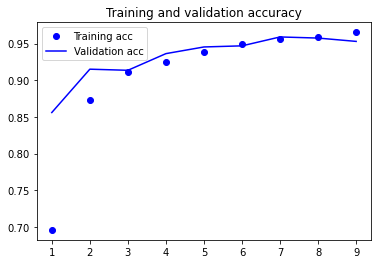

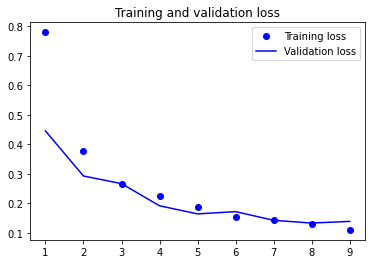

In [33]:
training_plots(history)

In [34]:
model_evaluation_128_20(model, [test_directory])

Found 661 images belonging to 4 classes.


<ipython-input-11-bad17ae776fb>:15: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(generator, steps=epoch_steps)


                   precision    recall  f1-score   support

    fully_covered       0.99      0.92      0.95       145
      not_covered       0.96      0.99      0.97       366
         not_face       0.95      0.94      0.95       111
partially_covered       0.93      0.95      0.94        39

         accuracy                           0.96       661
        macro avg       0.96      0.95      0.95       661
     weighted avg       0.96      0.96      0.96       661



### 2.3. Model 2 - 150x150px//batch_size = 20

In [35]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['categorical_accuracy'])

D:\anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [36]:
history = model.fit(
    train_generator150_20,
    steps_per_epoch = 264,  # train_n_samples=5297; batch_size=20
    epochs = 30,
    callbacks = callbacks_list,
    validation_data = validation_generator150_20,
    validation_steps = 33 #  validation_n_samples=663; batch_size=20
)

Epoch 1/30
264/264 [==============================] - 104s 392ms/step - loss: 0.7479 - categorical_accuracy: 0.7044 - val_loss: 0.3931 - val_categorical_accuracy: 0.8727
Epoch 2/30
264/264 [==============================] - 114s 432ms/step - loss: 0.3597 - categorical_accuracy: 0.8755 - val_loss: 0.2887 - val_categorical_accuracy: 0.9106
Epoch 3/30
264/264 [==============================] - 121s 456ms/step - loss: 0.2735 - categorical_accuracy: 0.9094 - val_loss: 0.2301 - val_categorical_accuracy: 0.9212
Epoch 4/30
264/264 [==============================] - 108s 410ms/step - loss: 0.2122 - categorical_accuracy: 0.9301 - val_loss: 0.1933 - val_categorical_accuracy: 0.9394
Epoch 5/30
264/264 [==============================] - 106s 402ms/step - loss: 0.1821 - categorical_accuracy: 0.9416 - val_loss: 0.1846 - val_categorical_accuracy: 0.9348
Epoch 6/30
264/264 [==============================] - 106s 401ms/step - loss: 0.1610 - categorical_accuracy: 0.9468 - val_loss: 0.1563 - val_categoric

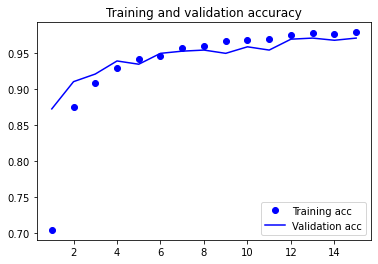

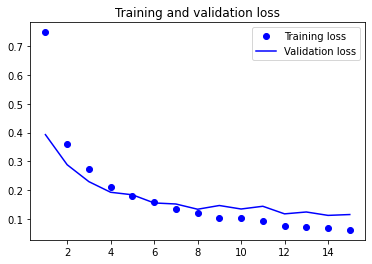

In [37]:
training_plots(history)

In [38]:
model_evaluation_150_20(model, [test_directory])

Found 661 images belonging to 4 classes.


<ipython-input-12-e59ee181f5d9>:15: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(generator, steps=epoch_steps)


                   precision    recall  f1-score   support

    fully_covered       0.99      0.99      0.99       145
      not_covered       0.99      0.99      0.99       366
         not_face       0.94      0.98      0.96       111
partially_covered       1.00      0.92      0.96        39

         accuracy                           0.98       661
        macro avg       0.98      0.97      0.97       661
     weighted avg       0.98      0.98      0.98       661



### 2.4. Model 2 - 64x64px//batch_size = 32

In [76]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['categorical_accuracy'])

D:\anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [77]:
history = model.fit(
    train_generator64_32,
    steps_per_epoch = 165,  # train_n_samples=5297; batch_size=32
    epochs = 30,
    callbacks = callbacks_list,
    validation_data = validation_generator64_32,
    validation_steps = 20 #  validation_n_samples=663; batch_size=32
)

Epoch 1/30
165/165 [==============================] - 14s 80ms/step - loss: 1.1057 - categorical_accuracy: 0.5605 - val_loss: 0.9652 - val_categorical_accuracy: 0.5734
Epoch 2/30
165/165 [==============================] - 13s 81ms/step - loss: 0.8421 - categorical_accuracy: 0.6815 - val_loss: 0.6363 - val_categorical_accuracy: 0.7734
Epoch 3/30
165/165 [==============================] - 14s 84ms/step - loss: 0.6093 - categorical_accuracy: 0.7704 - val_loss: 0.4745 - val_categorical_accuracy: 0.8203
Epoch 4/30
165/165 [==============================] - 14s 88ms/step - loss: 0.4751 - categorical_accuracy: 0.8249 - val_loss: 0.4293 - val_categorical_accuracy: 0.8109
Epoch 5/30
165/165 [==============================] - 15s 92ms/step - loss: 0.4023 - categorical_accuracy: 0.8583 - val_loss: 0.3205 - val_categorical_accuracy: 0.8891
Epoch 6/30
165/165 [==============================] - 15s 93ms/step - loss: 0.3475 - categorical_accuracy: 0.8754 - val_loss: 0.2861 - val_categorical_accuracy:

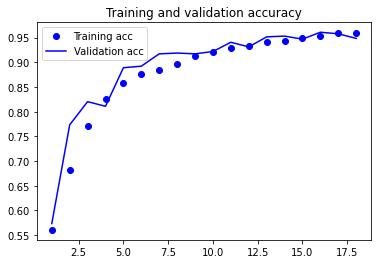

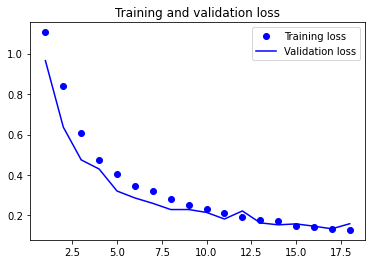

In [78]:
training_plots(history)

In [79]:
model_evaluation_64_32(model, [test_directory])

Found 661 images belonging to 4 classes.


<ipython-input-10-a9619eae2628>:40: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(generator, steps=epoch_steps)


                   precision    recall  f1-score   support

    fully_covered       0.90      0.97      0.93       145
      not_covered       0.98      0.98      0.98       366
         not_face       0.96      0.82      0.88       111
partially_covered       0.84      0.92      0.88        39

         accuracy                           0.95       661
        macro avg       0.92      0.92      0.92       661
     weighted avg       0.95      0.95      0.95       661



### 2.5. Model 2 - 64x64px//batch_size = 64

In [80]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['categorical_accuracy'])

D:\anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [81]:
history = model.fit(
    train_generator64_64,
    steps_per_epoch = 82,  # train_n_samples=5297; batch_size=64
    epochs = 30,
    callbacks = callbacks_list,
    validation_data = validation_generator64_64,
    validation_steps = 10 #  validation_n_samples=663; batch_size=64
)

Epoch 1/30
82/82 [==============================] - 15s 174ms/step - loss: 1.1364 - categorical_accuracy: 0.5500 - val_loss: 1.0342 - val_categorical_accuracy: 0.5609
Epoch 2/30
82/82 [==============================] - 14s 167ms/step - loss: 0.9694 - categorical_accuracy: 0.6197 - val_loss: 0.8642 - val_categorical_accuracy: 0.6687
Epoch 3/30
82/82 [==============================] - 14s 169ms/step - loss: 0.8112 - categorical_accuracy: 0.6973 - val_loss: 0.6901 - val_categorical_accuracy: 0.7609
Epoch 4/30
82/82 [==============================] - 14s 170ms/step - loss: 0.6731 - categorical_accuracy: 0.7418 - val_loss: 0.5481 - val_categorical_accuracy: 0.7859
Epoch 5/30
82/82 [==============================] - 13s 162ms/step - loss: 0.5657 - categorical_accuracy: 0.7873 - val_loss: 0.4851 - val_categorical_accuracy: 0.8000
Epoch 6/30
82/82 [==============================] - 12s 151ms/step - loss: 0.4894 - categorical_accuracy: 0.8179 - val_loss: 0.4430 - val_categorical_accuracy: 0.832

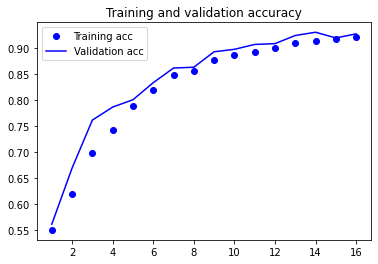

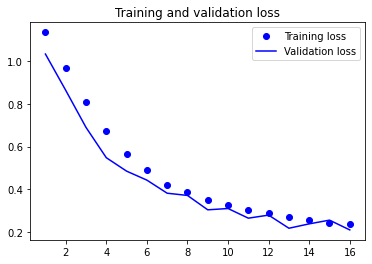

In [82]:
training_plots(history)

In [83]:
model_evaluation_64_64(model, [test_directory])

Found 661 images belonging to 4 classes.


<ipython-input-10-a9619eae2628>:65: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(generator, steps=epoch_steps)


                   precision    recall  f1-score   support

    fully_covered       0.93      0.93      0.93       145
      not_covered       0.94      0.98      0.96       366
         not_face       0.90      0.79      0.84       111
partially_covered       0.97      0.92      0.95        39

         accuracy                           0.93       661
        macro avg       0.94      0.91      0.92       661
     weighted avg       0.93      0.93      0.93       661



### 2.6. Saving the best model Model 2

The best model is the one trained with images with image size = 64x64px and the chosen batch_size is 20

In [103]:
callbacks_list_saving_model2 = [
    keras.callbacks.EarlyStopping(
    monitor = 'val_categorical_accuracy',
    patience = 2),
    keras.callbacks.ModelCheckpoint(
        filepath = 'saved_models/model2.h5',
        monitor = 'val_categorical_accuracy',
        save_best_only = True
    )
]

In [104]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['categorical_accuracy'])

In [105]:
history = model.fit(
    train_generator64_20,
    steps_per_epoch = 264,  # train_n_samples=5297; batch_size=20
    epochs = 30,
    callbacks = callbacks_list_saving_model2,
    validation_data = validation_generator64_20,
    validation_steps = 33 #  validation_n_samples=663; batch_size=20
)

Epoch 1/30
264/264 [==============================] - 16s 59ms/step - loss: 1.0696 - categorical_accuracy: 0.5710 - val_loss: 0.8760 - val_categorical_accuracy: 0.6833
Epoch 2/30
264/264 [==============================] - 15s 58ms/step - loss: 0.7606 - categorical_accuracy: 0.7169 - val_loss: 0.5833 - val_categorical_accuracy: 0.7652
Epoch 3/30
264/264 [==============================] - 15s 58ms/step - loss: 0.5208 - categorical_accuracy: 0.8010 - val_loss: 0.4509 - val_categorical_accuracy: 0.8258
Epoch 4/30
264/264 [==============================] - 15s 57ms/step - loss: 0.4121 - categorical_accuracy: 0.8528 - val_loss: 0.3345 - val_categorical_accuracy: 0.8848
Epoch 5/30
264/264 [==============================] - 16s 59ms/step - loss: 0.3559 - categorical_accuracy: 0.8783 - val_loss: 0.2958 - val_categorical_accuracy: 0.8894
Epoch 6/30
264/264 [==============================] - 16s 61ms/step - loss: 0.3007 - categorical_accuracy: 0.8992 - val_loss: 0.2395 - val_categorical_accuracy:

## 3. Model 3

We will train this model for the 3 different image sizes (64x64px, 128x128px, 150x150px). After finding which one is the best, we will train the model for that image size, for different batch_sizes. This model is similar to model 2, but has a dropout layer (with value 0.2) after the flatten layer

### 3.1. Model 3 - 64x64px//batch_size = 20

In [39]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['categorical_accuracy'])

D:\anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [40]:
history = model.fit(
    train_generator64_20,
    steps_per_epoch = 264,  # train_n_samples=5297; batch_size=20
    epochs = 30,
    callbacks = callbacks_list,
    validation_data = validation_generator64_20,
    validation_steps = 33 #  validation_n_samples=663; batch_size=20
)

Epoch 1/30
264/264 [==============================] - 22s 78ms/step - loss: 1.0340 - categorical_accuracy: 0.6020 - val_loss: 0.8751 - val_categorical_accuracy: 0.6652
Epoch 2/30
264/264 [==============================] - 19s 70ms/step - loss: 0.6683 - categorical_accuracy: 0.7544 - val_loss: 0.4810 - val_categorical_accuracy: 0.8121
Epoch 3/30
264/264 [==============================] - 19s 73ms/step - loss: 0.4564 - categorical_accuracy: 0.8291 - val_loss: 0.3943 - val_categorical_accuracy: 0.8439
Epoch 4/30
264/264 [==============================] - 20s 75ms/step - loss: 0.3636 - categorical_accuracy: 0.8696 - val_loss: 0.3232 - val_categorical_accuracy: 0.8758
Epoch 5/30
264/264 [==============================] - 18s 69ms/step - loss: 0.2983 - categorical_accuracy: 0.8926 - val_loss: 0.2767 - val_categorical_accuracy: 0.8924
Epoch 6/30
264/264 [==============================] - 18s 70ms/step - loss: 0.2516 - categorical_accuracy: 0.9119 - val_loss: 0.2131 - val_categorical_accuracy:

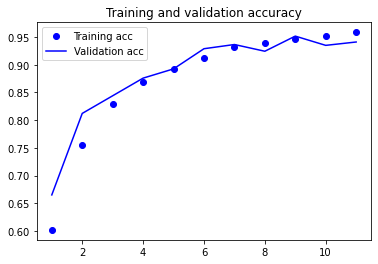

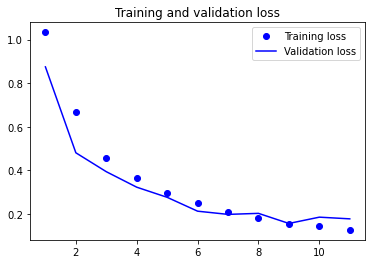

In [41]:
training_plots(history)

In [42]:
model_evaluation_64_20(model, [test_directory])

Found 661 images belonging to 4 classes.


<ipython-input-10-a9619eae2628>:15: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(generator, steps=epoch_steps)


                   precision    recall  f1-score   support

    fully_covered       0.94      0.95      0.95       145
      not_covered       1.00      0.95      0.97       366
         not_face       0.83      0.96      0.89       111
partially_covered       0.92      0.90      0.91        39

         accuracy                           0.95       661
        macro avg       0.92      0.94      0.93       661
     weighted avg       0.95      0.95      0.95       661



### 3.2. Model 3 - 128x128px//batch_size = 20

In [43]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['categorical_accuracy'])

D:\anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [44]:
history = model.fit(
    train_generator128_20,
    steps_per_epoch = 264,  # train_n_samples=5297; batch_size=20
    epochs = 30,
    callbacks = callbacks_list,
    validation_data = validation_generator128_20,
    validation_steps = 33 #  validation_n_samples=663; batch_size=20
)

Epoch 1/30
264/264 [==============================] - 83s 311ms/step - loss: 0.6977 - categorical_accuracy: 0.7360 - val_loss: 0.3480 - val_categorical_accuracy: 0.8879
Epoch 2/30
264/264 [==============================] - 79s 299ms/step - loss: 0.3227 - categorical_accuracy: 0.8924 - val_loss: 0.2486 - val_categorical_accuracy: 0.9273
Epoch 3/30
264/264 [==============================] - 74s 282ms/step - loss: 0.2294 - categorical_accuracy: 0.9244 - val_loss: 0.2247 - val_categorical_accuracy: 0.9273
Epoch 4/30
264/264 [==============================] - 76s 286ms/step - loss: 0.1740 - categorical_accuracy: 0.9418 - val_loss: 0.1518 - val_categorical_accuracy: 0.9485
Epoch 5/30
264/264 [==============================] - 82s 312ms/step - loss: 0.1393 - categorical_accuracy: 0.9572 - val_loss: 0.1303 - val_categorical_accuracy: 0.9545
Epoch 6/30
264/264 [==============================] - 81s 307ms/step - loss: 0.1137 - categorical_accuracy: 0.9640 - val_loss: 0.1346 - val_categorical_acc

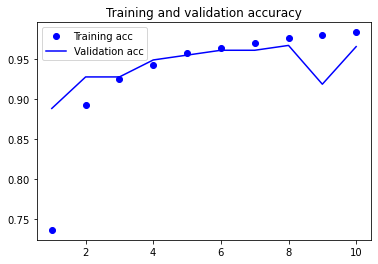

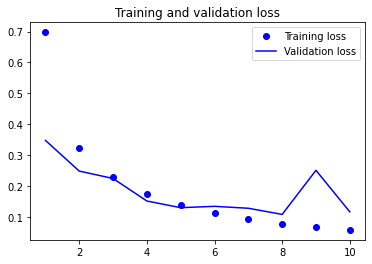

In [45]:
training_plots(history)

In [46]:
model_evaluation_128_20(model, [test_directory])

Found 661 images belonging to 4 classes.


<ipython-input-11-bad17ae776fb>:15: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(generator, steps=epoch_steps)


                   precision    recall  f1-score   support

    fully_covered       0.97      0.98      0.98       145
      not_covered       0.99      0.99      0.99       366
         not_face       0.96      0.97      0.97       111
partially_covered       0.97      0.95      0.96        39

         accuracy                           0.98       661
        macro avg       0.97      0.97      0.97       661
     weighted avg       0.98      0.98      0.98       661



### 3.3. Model 3 - 150x150px//batch_size = 20

In [47]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['categorical_accuracy'])

D:\anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [48]:
history = model.fit(
    train_generator150_20,
    steps_per_epoch = 264,  # train_n_samples=5297; batch_size=20
    epochs = 30,
    callbacks = callbacks_list,
    validation_data = validation_generator150_20,
    validation_steps = 33 #  validation_n_samples=663; batch_size=20
)

Epoch 1/30
264/264 [==============================] - 104s 392ms/step - loss: 0.6739 - categorical_accuracy: 0.7375 - val_loss: 0.3638 - val_categorical_accuracy: 0.8652
Epoch 2/30
264/264 [==============================] - 107s 404ms/step - loss: 0.3182 - categorical_accuracy: 0.8903 - val_loss: 0.2281 - val_categorical_accuracy: 0.9303
Epoch 3/30
264/264 [==============================] - 116s 439ms/step - loss: 0.2311 - categorical_accuracy: 0.9253 - val_loss: 0.2008 - val_categorical_accuracy: 0.9318
Epoch 4/30
264/264 [==============================] - 105s 397ms/step - loss: 0.1745 - categorical_accuracy: 0.9439 - val_loss: 0.1770 - val_categorical_accuracy: 0.9424
Epoch 5/30
264/264 [==============================] - 101s 384ms/step - loss: 0.1422 - categorical_accuracy: 0.9526 - val_loss: 0.1899 - val_categorical_accuracy: 0.9424
Epoch 6/30
264/264 [==============================] - 112s 425ms/step - loss: 0.1198 - categorical_accuracy: 0.9606 - val_loss: 0.1430 - val_categoric

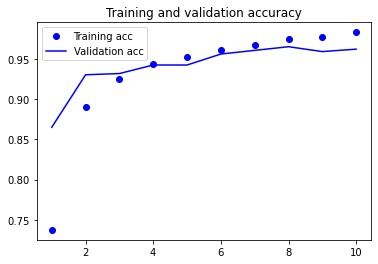

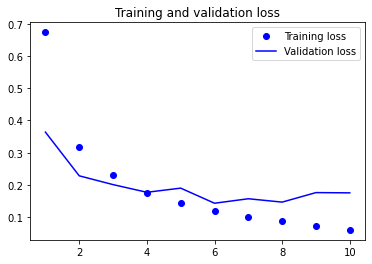

In [49]:
training_plots(history)

In [50]:
model_evaluation_150_20(model, [test_directory])

Found 661 images belonging to 4 classes.


<ipython-input-12-e59ee181f5d9>:15: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(generator, steps=epoch_steps)


                   precision    recall  f1-score   support

    fully_covered       0.98      0.94      0.96       145
      not_covered       0.98      0.99      0.98       366
         not_face       0.93      0.98      0.96       111
partially_covered       1.00      0.90      0.95        39

         accuracy                           0.97       661
        macro avg       0.97      0.95      0.96       661
     weighted avg       0.97      0.97      0.97       661



### 3.4. Model 3 - 64x64px//batch_size = 32

In [84]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['categorical_accuracy'])

D:\anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [85]:
history = model.fit(
    train_generator64_32,
    steps_per_epoch = 165,  # train_n_samples=5297; batch_size=32
    epochs = 30,
    callbacks = callbacks_list,
    validation_data = validation_generator64_32,
    validation_steps = 20 #  validation_n_samples=663; batch_size=32
)

Epoch 1/30
165/165 [==============================] - 18s 107ms/step - loss: 1.0546 - categorical_accuracy: 0.5899 - val_loss: 0.8562 - val_categorical_accuracy: 0.6875
Epoch 2/30
165/165 [==============================] - 16s 98ms/step - loss: 0.7480 - categorical_accuracy: 0.7229 - val_loss: 0.5903 - val_categorical_accuracy: 0.7906
Epoch 3/30
165/165 [==============================] - 18s 108ms/step - loss: 0.5250 - categorical_accuracy: 0.8127 - val_loss: 0.4295 - val_categorical_accuracy: 0.8328
Epoch 4/30
165/165 [==============================] - 17s 101ms/step - loss: 0.4236 - categorical_accuracy: 0.8452 - val_loss: 0.3781 - val_categorical_accuracy: 0.8625
Epoch 5/30
165/165 [==============================] - 17s 102ms/step - loss: 0.3564 - categorical_accuracy: 0.8733 - val_loss: 0.3283 - val_categorical_accuracy: 0.8766
Epoch 6/30
165/165 [==============================] - 17s 101ms/step - loss: 0.3115 - categorical_accuracy: 0.8902 - val_loss: 0.3100 - val_categorical_accu

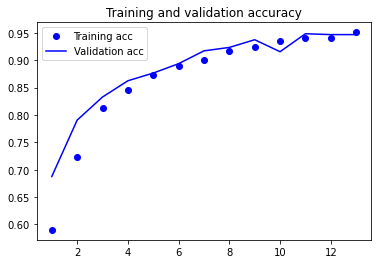

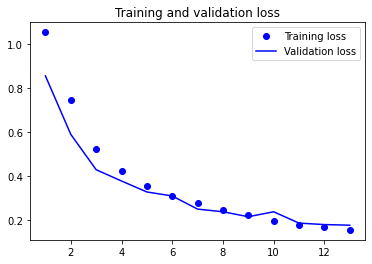

In [86]:
training_plots(history)

In [87]:
model_evaluation_64_32(model, [test_directory])

Found 661 images belonging to 4 classes.


<ipython-input-10-a9619eae2628>:40: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(generator, steps=epoch_steps)


                   precision    recall  f1-score   support

    fully_covered       0.97      0.96      0.96       145
      not_covered       0.99      0.97      0.98       366
         not_face       0.86      0.96      0.91       111
partially_covered       1.00      0.90      0.95        39

         accuracy                           0.96       661
        macro avg       0.95      0.95      0.95       661
     weighted avg       0.96      0.96      0.96       661



### 3.5. Model 3 - 64x64px//batch_size = 64

In [88]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['categorical_accuracy'])

D:\anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [89]:
history = model.fit(
    train_generator64_64,
    steps_per_epoch = 82,  # train_n_samples=5297; batch_size=64
    epochs = 30,
    callbacks = callbacks_list,
    validation_data = validation_generator64_64,
    validation_steps = 10 #  validation_n_samples=663; batch_size=64
)

Epoch 1/30
82/82 [==============================] - 15s 172ms/step - loss: 1.1236 - categorical_accuracy: 0.5561 - val_loss: 0.9960 - val_categorical_accuracy: 0.5641
Epoch 2/30
82/82 [==============================] - 14s 175ms/step - loss: 0.9398 - categorical_accuracy: 0.6327 - val_loss: 0.8700 - val_categorical_accuracy: 0.6187
Epoch 3/30
82/82 [==============================] - 15s 179ms/step - loss: 0.7840 - categorical_accuracy: 0.7015 - val_loss: 0.6580 - val_categorical_accuracy: 0.7609
Epoch 4/30
82/82 [==============================] - 15s 177ms/step - loss: 0.6321 - categorical_accuracy: 0.7638 - val_loss: 0.5546 - val_categorical_accuracy: 0.7859
Epoch 5/30
82/82 [==============================] - 14s 172ms/step - loss: 0.5231 - categorical_accuracy: 0.8036 - val_loss: 0.4819 - val_categorical_accuracy: 0.8062
Epoch 6/30
82/82 [==============================] - 14s 172ms/step - loss: 0.4486 - categorical_accuracy: 0.8376 - val_loss: 0.4674 - val_categorical_accuracy: 0.825

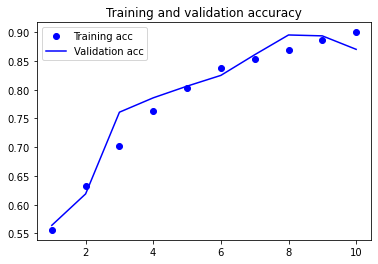

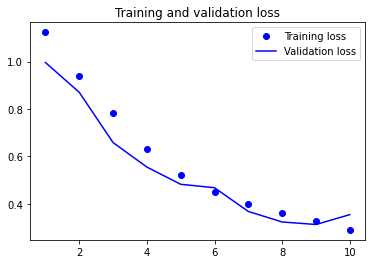

In [90]:
training_plots(history)

In [91]:
model_evaluation_64_64(model, [test_directory])

Found 661 images belonging to 4 classes.


<ipython-input-10-a9619eae2628>:65: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(generator, steps=epoch_steps)


                   precision    recall  f1-score   support

    fully_covered       0.77      0.95      0.85       145
      not_covered       0.94      0.93      0.94       366
         not_face       0.89      0.60      0.72       111
partially_covered       0.78      0.90      0.83        39

         accuracy                           0.88       661
        macro avg       0.85      0.85      0.84       661
     weighted avg       0.89      0.88      0.88       661



### 3.6. Saving the best model Model 3

The best model is the one trained with images with image size = 64x64px and the chosen batch_size is 32

In [106]:
callbacks_list_saving_model3 = [
    keras.callbacks.EarlyStopping(
    monitor = 'val_categorical_accuracy',
    patience = 2),
    keras.callbacks.ModelCheckpoint(
        filepath = 'saved_models/model3.h5',
        monitor = 'val_categorical_accuracy',
        save_best_only = True
    )
]

In [107]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['categorical_accuracy'])

In [108]:
history = model.fit(
    train_generator64_32,
    steps_per_epoch = 165,  # train_n_samples=5297; batch_size=32
    epochs = 30,
    callbacks = callbacks_list_saving_model3,
    validation_data = validation_generator64_32,
    validation_steps = 20 #  validation_n_samples=663; batch_size=32
)

Epoch 1/30
165/165 [==============================] - 16s 91ms/step - loss: 1.0722 - categorical_accuracy: 0.5827 - val_loss: 0.8733 - val_categorical_accuracy: 0.6922
Epoch 2/30
165/165 [==============================] - 15s 92ms/step - loss: 0.7841 - categorical_accuracy: 0.7111 - val_loss: 0.6298 - val_categorical_accuracy: 0.7563
Epoch 3/30
165/165 [==============================] - 16s 98ms/step - loss: 0.5582 - categorical_accuracy: 0.7930 - val_loss: 0.4693 - val_categorical_accuracy: 0.8234
Epoch 4/30
165/165 [==============================] - 16s 97ms/step - loss: 0.4403 - categorical_accuracy: 0.8393 - val_loss: 0.3872 - val_categorical_accuracy: 0.8438
Epoch 5/30
165/165 [==============================] - 15s 90ms/step - loss: 0.3647 - categorical_accuracy: 0.8716 - val_loss: 0.3302 - val_categorical_accuracy: 0.8797
Epoch 6/30
165/165 [==============================] - 16s 95ms/step - loss: 0.3104 - categorical_accuracy: 0.8900 - val_loss: 0.3090 - val_categorical_accuracy:

## 4. Model 4

We will train this model for the 3 different image sizes (64x64px, 128x128px, 150x150px). After finding which one is the best, we will train the model for that image size, for different batch_sizes.

### 4.1. Model 4 - 64x64px//batch_size = 20

In [51]:
model = models.Sequential()
model.add(layers.Conv2D(16, (3,3), activation='relu', input_shape=(64,64,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['categorical_accuracy'])

D:\anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [52]:
history = model.fit(
    train_generator64_20,
    steps_per_epoch = 264,  # train_n_samples=5297; batch_size=20
    epochs = 30,
    callbacks = callbacks_list,
    validation_data = validation_generator64_20,
    validation_steps = 33 #  validation_n_samples=663; batch_size=20
)

Epoch 1/30
264/264 [==============================] - 11s 39ms/step - loss: 1.1185 - categorical_accuracy: 0.5670 - val_loss: 1.0946 - val_categorical_accuracy: 0.6591
Epoch 2/30
264/264 [==============================] - 10s 37ms/step - loss: 0.9757 - categorical_accuracy: 0.6426 - val_loss: 0.9040 - val_categorical_accuracy: 0.7167
Epoch 3/30
264/264 [==============================] - 10s 37ms/step - loss: 0.8630 - categorical_accuracy: 0.6773 - val_loss: 0.8401 - val_categorical_accuracy: 0.7091
Epoch 4/30
264/264 [==============================] - 11s 40ms/step - loss: 0.7278 - categorical_accuracy: 0.7341 - val_loss: 0.6807 - val_categorical_accuracy: 0.7394
Epoch 5/30
264/264 [==============================] - 10s 39ms/step - loss: 0.5959 - categorical_accuracy: 0.7842 - val_loss: 0.5536 - val_categorical_accuracy: 0.8076
Epoch 6/30
264/264 [==============================] - 11s 42ms/step - loss: 0.5138 - categorical_accuracy: 0.8109 - val_loss: 0.4831 - val_categorical_accuracy:

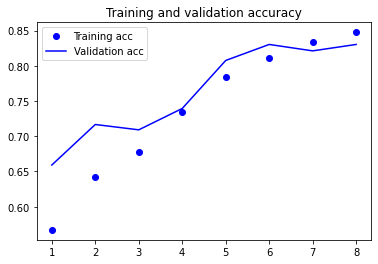

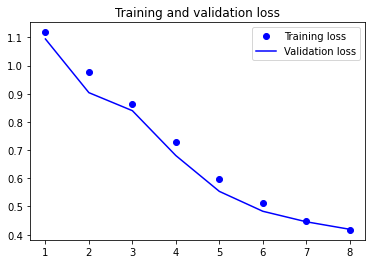

In [53]:
training_plots(history)

In [54]:
model_evaluation_64_20(model, [test_directory])

Found 661 images belonging to 4 classes.


<ipython-input-10-a9619eae2628>:15: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(generator, steps=epoch_steps)


                   precision    recall  f1-score   support

    fully_covered       0.90      0.83      0.86       145
      not_covered       0.86      0.96      0.91       366
         not_face       0.85      0.60      0.71       111
partially_covered       0.80      0.82      0.81        39

         accuracy                           0.86       661
        macro avg       0.85      0.80      0.82       661
     weighted avg       0.86      0.86      0.86       661



### 4.2. Model 4 - 128x128px//batch_size = 20

In [55]:
model = models.Sequential()
model.add(layers.Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['categorical_accuracy'])

D:\anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [56]:
history = model.fit(
    train_generator128_20,
    steps_per_epoch = 264,  # train_n_samples=5297; batch_size=20
    epochs = 30,
    callbacks = callbacks_list,
    validation_data = validation_generator128_20,
    validation_steps = 33 #  validation_n_samples=663; batch_size=20
)

Epoch 1/30
264/264 [==============================] - 41s 152ms/step - loss: 0.9541 - categorical_accuracy: 0.6168 - val_loss: 0.8585 - val_categorical_accuracy: 0.6394
Epoch 2/30
264/264 [==============================] - 41s 154ms/step - loss: 0.5910 - categorical_accuracy: 0.7707 - val_loss: 0.5067 - val_categorical_accuracy: 0.8091
Epoch 3/30
264/264 [==============================] - 41s 155ms/step - loss: 0.3813 - categorical_accuracy: 0.8632 - val_loss: 0.3913 - val_categorical_accuracy: 0.8515
Epoch 4/30
264/264 [==============================] - 38s 145ms/step - loss: 0.3067 - categorical_accuracy: 0.8950 - val_loss: 0.3196 - val_categorical_accuracy: 0.8909
Epoch 5/30
264/264 [==============================] - 39s 148ms/step - loss: 0.2650 - categorical_accuracy: 0.9077 - val_loss: 0.3100 - val_categorical_accuracy: 0.8909
Epoch 6/30
264/264 [==============================] - 40s 150ms/step - loss: 0.2257 - categorical_accuracy: 0.9225 - val_loss: 0.2844 - val_categorical_acc

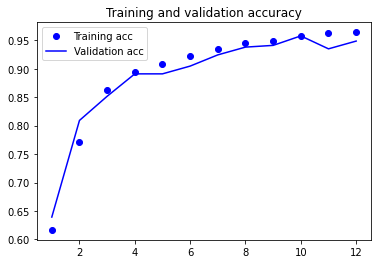

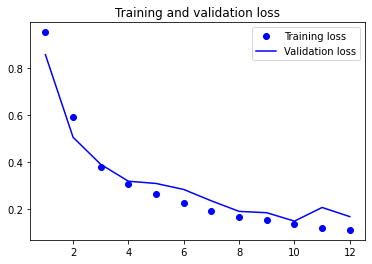

In [57]:
training_plots(history)

In [58]:
model_evaluation_128_20(model, [test_directory])

Found 661 images belonging to 4 classes.


<ipython-input-11-bad17ae776fb>:15: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(generator, steps=epoch_steps)


                   precision    recall  f1-score   support

    fully_covered       0.99      0.88      0.93       145
      not_covered       0.97      0.99      0.98       366
         not_face       0.91      0.97      0.94       111
partially_covered       0.92      0.92      0.92        39

         accuracy                           0.96       661
        macro avg       0.95      0.94      0.94       661
     weighted avg       0.96      0.96      0.96       661



### 4.3. Model 4 - 150x150px//batch_size = 20

In [59]:
model = models.Sequential()
model.add(layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['categorical_accuracy'])

D:\anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [60]:
history = model.fit(
    train_generator150_20,
    steps_per_epoch = 264,  # train_n_samples=5297; batch_size=20
    epochs = 30,
    callbacks = callbacks_list,
    validation_data = validation_generator150_20,
    validation_steps = 33 #  validation_n_samples=663; batch_size=20
)

Epoch 1/30
264/264 [==============================] - 46s 171ms/step - loss: 0.9260 - categorical_accuracy: 0.6362 - val_loss: 0.8444 - val_categorical_accuracy: 0.7318
Epoch 2/30
264/264 [==============================] - 44s 167ms/step - loss: 0.5669 - categorical_accuracy: 0.7883 - val_loss: 0.4782 - val_categorical_accuracy: 0.8258
Epoch 3/30
264/264 [==============================] - 44s 167ms/step - loss: 0.3685 - categorical_accuracy: 0.8711 - val_loss: 0.3595 - val_categorical_accuracy: 0.8727
Epoch 4/30
264/264 [==============================] - 44s 167ms/step - loss: 0.2956 - categorical_accuracy: 0.8967 - val_loss: 0.3114 - val_categorical_accuracy: 0.8970
Epoch 5/30
264/264 [==============================] - 44s 167ms/step - loss: 0.2434 - categorical_accuracy: 0.9161 - val_loss: 0.3113 - val_categorical_accuracy: 0.8985
Epoch 6/30
264/264 [==============================] - 46s 174ms/step - loss: 0.2098 - categorical_accuracy: 0.9291 - val_loss: 0.2283 - val_categorical_acc

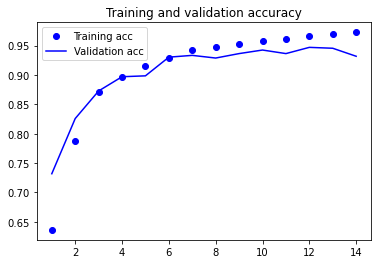

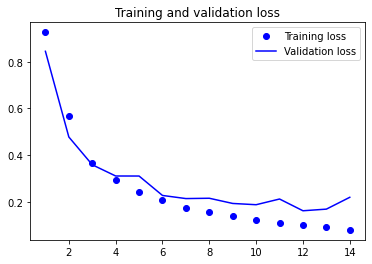

In [61]:
training_plots(history)

In [62]:
model_evaluation_150_20(model, [test_directory])

Found 661 images belonging to 4 classes.


<ipython-input-12-e59ee181f5d9>:15: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(generator, steps=epoch_steps)


                   precision    recall  f1-score   support

    fully_covered       0.97      0.88      0.92       145
      not_covered       0.96      0.99      0.97       366
         not_face       0.90      0.93      0.92       111
partially_covered       0.92      0.92      0.92        39

         accuracy                           0.95       661
        macro avg       0.94      0.93      0.93       661
     weighted avg       0.95      0.95      0.95       661



### 4.4. Model 4 - 128x128px//batch_size = 32

In [92]:
model = models.Sequential()
model.add(layers.Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['categorical_accuracy'])

D:\anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [93]:
history = model.fit(
    train_generator128_32,
    steps_per_epoch = 165,  # train_n_samples=5297; batch_size=32
    epochs = 30,
    callbacks = callbacks_list,
    validation_data = validation_generator128_32,
    validation_steps = 20 #  validation_n_samples=663; batch_size=32
)

Epoch 1/30
165/165 [==============================] - 30s 176ms/step - loss: 0.9810 - categorical_accuracy: 0.6097 - val_loss: 0.9868 - val_categorical_accuracy: 0.6422
Epoch 2/30
165/165 [==============================] - 28s 171ms/step - loss: 0.7565 - categorical_accuracy: 0.6946 - val_loss: 0.7624 - val_categorical_accuracy: 0.7188
Epoch 3/30
165/165 [==============================] - 30s 181ms/step - loss: 0.5569 - categorical_accuracy: 0.7856 - val_loss: 0.5520 - val_categorical_accuracy: 0.8078
Epoch 4/30
165/165 [==============================] - 30s 181ms/step - loss: 0.3903 - categorical_accuracy: 0.8674 - val_loss: 0.4135 - val_categorical_accuracy: 0.8500
Epoch 5/30
165/165 [==============================] - 30s 182ms/step - loss: 0.3140 - categorical_accuracy: 0.8900 - val_loss: 0.3142 - val_categorical_accuracy: 0.8969
Epoch 6/30
165/165 [==============================] - 31s 185ms/step - loss: 0.2694 - categorical_accuracy: 0.9107 - val_loss: 0.2753 - val_categorical_acc

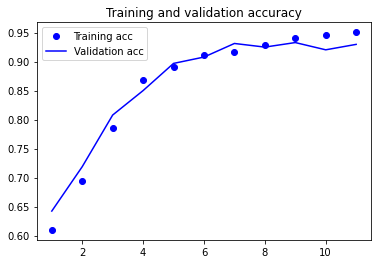

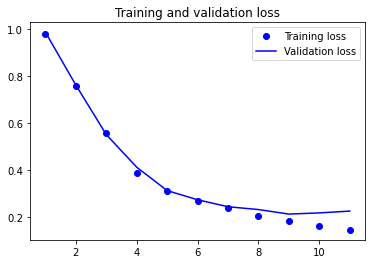

In [94]:
training_plots(history)

In [95]:
model_evaluation_128_32(model, [test_directory])

Found 661 images belonging to 4 classes.


<ipython-input-11-bad17ae776fb>:40: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(generator, steps=epoch_steps)


                   precision    recall  f1-score   support

    fully_covered       0.99      0.90      0.95       145
      not_covered       0.91      0.99      0.95       366
         not_face       0.99      0.81      0.89       111
partially_covered       0.92      0.87      0.89        39

         accuracy                           0.93       661
        macro avg       0.95      0.89      0.92       661
     weighted avg       0.94      0.93      0.93       661



### 4.5. Model 4 - 128x128px//batch_size = 64

In [96]:
model = models.Sequential()
model.add(layers.Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['categorical_accuracy'])

D:\anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [97]:
history = model.fit(
    train_generator128_64,
    steps_per_epoch = 82,  # train_n_samples=5297; batch_size=64
    epochs = 30,
    callbacks = callbacks_list,
    validation_data = validation_generator128_64,
    validation_steps = 10 #  validation_n_samples=663; batch_size=64
)

Epoch 1/30
82/82 [==============================] - 32s 386ms/step - loss: 1.0475 - categorical_accuracy: 0.5819 - val_loss: 1.0422 - val_categorical_accuracy: 0.6547
Epoch 2/30
82/82 [==============================] - 32s 390ms/step - loss: 0.8085 - categorical_accuracy: 0.6860 - val_loss: 0.7681 - val_categorical_accuracy: 0.7625
Epoch 3/30
82/82 [==============================] - 32s 394ms/step - loss: 0.5842 - categorical_accuracy: 0.7825 - val_loss: 0.5667 - val_categorical_accuracy: 0.8031
Epoch 4/30
82/82 [==============================] - 32s 390ms/step - loss: 0.4289 - categorical_accuracy: 0.8444 - val_loss: 0.4393 - val_categorical_accuracy: 0.8422
Epoch 5/30
82/82 [==============================] - 31s 378ms/step - loss: 0.3555 - categorical_accuracy: 0.8771 - val_loss: 0.3619 - val_categorical_accuracy: 0.8906
Epoch 6/30
82/82 [==============================] - 31s 372ms/step - loss: 0.3040 - categorical_accuracy: 0.8957 - val_loss: 0.3108 - val_categorical_accuracy: 0.889

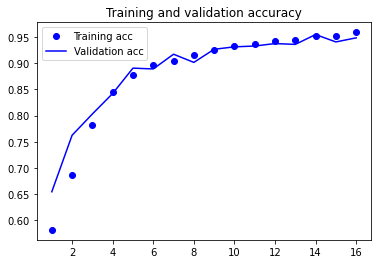

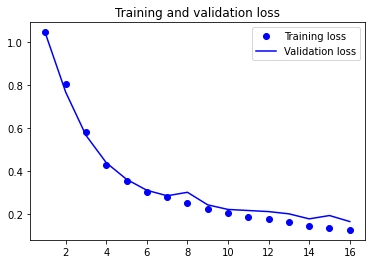

In [98]:
training_plots(history)

In [99]:
model_evaluation_128_64(model, [test_directory])

Found 661 images belonging to 4 classes.


<ipython-input-11-bad17ae776fb>:65: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(generator, steps=epoch_steps)


                   precision    recall  f1-score   support

    fully_covered       0.98      0.88      0.93       145
      not_covered       0.96      0.98      0.97       366
         not_face       0.91      0.95      0.93       111
partially_covered       0.95      0.92      0.94        39

         accuracy                           0.95       661
        macro avg       0.95      0.93      0.94       661
     weighted avg       0.95      0.95      0.95       661



### 4.6. Saving the best model Model 4

The best model is the one trained with images with image size = 128x128px and the chosen batch_size is 20

In [109]:
callbacks_list_saving_model4 = [
    keras.callbacks.EarlyStopping(
    monitor = 'val_categorical_accuracy',
    patience = 2),
    keras.callbacks.ModelCheckpoint(
        filepath = 'saved_models/model4.h5',
        monitor = 'val_categorical_accuracy',
        save_best_only = True
    )
]

In [110]:
model = models.Sequential()
model.add(layers.Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['categorical_accuracy'])

In [111]:
history = model.fit(
    train_generator128_20,
    steps_per_epoch = 264,  # train_n_samples=5297; batch_size=20
    epochs = 30,
    callbacks = callbacks_list_saving_model4,
    validation_data = validation_generator128_20,
    validation_steps = 33 #  validation_n_samples=663; batch_size=20
)

Epoch 1/30
264/264 [==============================] - 39s 143ms/step - loss: 0.9570 - categorical_accuracy: 0.6227 - val_loss: 0.9044 - val_categorical_accuracy: 0.7000
Epoch 2/30
264/264 [==============================] - 38s 144ms/step - loss: 0.6475 - categorical_accuracy: 0.7421 - val_loss: 0.5102 - val_categorical_accuracy: 0.8409
Epoch 3/30
264/264 [==============================] - 36s 136ms/step - loss: 0.3875 - categorical_accuracy: 0.8630 - val_loss: 0.3833 - val_categorical_accuracy: 0.8576
Epoch 4/30
264/264 [==============================] - 39s 149ms/step - loss: 0.3053 - categorical_accuracy: 0.8943 - val_loss: 0.2949 - val_categorical_accuracy: 0.9045
Epoch 5/30
264/264 [==============================] - 40s 152ms/step - loss: 0.2505 - categorical_accuracy: 0.9145 - val_loss: 0.2659 - val_categorical_accuracy: 0.9076
Epoch 6/30
264/264 [==============================] - 40s 151ms/step - loss: 0.2172 - categorical_accuracy: 0.9229 - val_loss: 0.2280 - val_categorical_acc

## 5. Model 5

This model follows the AlexNet architecture. We will train the model for a image size of 227x227px (which is the correct image size, according to the paper where the architecture was proposed) and a batch_size of 64.

In [63]:
callbacks_list_saving_alex_net = [
    keras.callbacks.EarlyStopping(
    monitor = 'val_categorical_accuracy',
    patience = 2),
    keras.callbacks.ModelCheckpoint(
        filepath = 'saved_models/alex_net_model.h5',
        monitor = 'val_categorical_accuracy',
        save_best_only = True
    )
]

In [64]:
model = models.Sequential()
model.add(layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)))
model.add(layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"))
model.add(layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
model.add(layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
model.add(layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
model.add(layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['categorical_accuracy'])

D:\anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [65]:
history = model.fit(
    train_generator_alex_net,
    steps_per_epoch = 82,  # train_n_samples=5297; batch_size=64
    epochs = 30,
    callbacks = callbacks_list_saving_alex_net,
    validation_data = validation_generator_alex_net,
    validation_steps = 10 #  validation_n_samples=663; batch_size=64
)

Epoch 1/30
82/82 [==============================] - 243s 3s/step - loss: 0.9638 - categorical_accuracy: 0.5964 - val_loss: 0.6642 - val_categorical_accuracy: 0.7641
Epoch 2/30
82/82 [==============================] - 1025s 13s/step - loss: 0.4954 - categorical_accuracy: 0.8122 - val_loss: 0.3930 - val_categorical_accuracy: 0.8687
Epoch 3/30
82/82 [==============================] - 240s 3s/step - loss: 0.2888 - categorical_accuracy: 0.9012 - val_loss: 0.2038 - val_categorical_accuracy: 0.9281
Epoch 4/30
82/82 [==============================] - 279s 3s/step - loss: 0.2157 - categorical_accuracy: 0.9281 - val_loss: 0.2646 - val_categorical_accuracy: 0.9359
Epoch 5/30
82/82 [==============================] - 1688s 21s/step - loss: 0.1509 - categorical_accuracy: 0.9509 - val_loss: 0.2550 - val_categorical_accuracy: 0.9203
Epoch 6/30
82/82 [==============================] - 206s 3s/step - loss: 0.1234 - categorical_accuracy: 0.9589 - val_loss: 0.2998 - val_categorical_accuracy: 0.9062


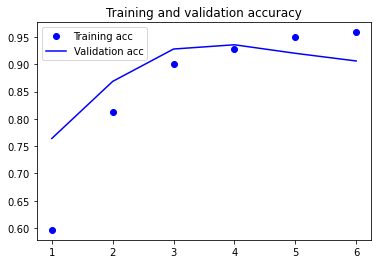

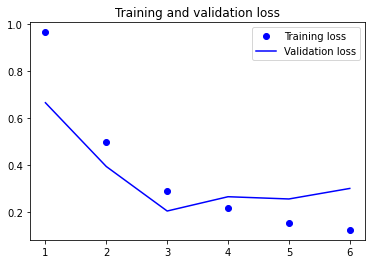

In [66]:
training_plots(history)

In [67]:
model_evaluation_227(model, [test_directory])

Found 661 images belonging to 4 classes.


<ipython-input-13-a9d2bbc97939>:15: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(generator, steps=epoch_steps)


                   precision    recall  f1-score   support

    fully_covered       0.98      0.77      0.86       145
      not_covered       0.94      0.96      0.95       366
         not_face       0.76      0.98      0.86       111
partially_covered       1.00      0.74      0.85        39

         accuracy                           0.91       661
        macro avg       0.92      0.86      0.88       661
     weighted avg       0.92      0.91      0.91       661

